In [8]:
%pylab inline
import pandas as pd
import numpy as np
%matplotlib inline

from fbprophet import Prophet


Populating the interactive namespace from numpy and matplotlib


# Começaremos às 20:05
### Como Criar Soluções de Data Science em 5 Passos Simples Mesmo Sem Ter Experiência. Visite ManualdeDataScience.com

# Prophet 
- Pessoas "sem treinamento em time series", mas com conhecimento do domínio fazerem previsões
- Time series de negócios
- Y = Tendência + Sazonalidade + Feriados
- Especificação de eventos especiais (changepoints)
- Sazonalidade = funções periódicas, série de Fourier
- Especificação de feriados
- Baselines sugeridas: último valor e média da amostra
- Métrica preferida: MAPE
- Requisitos: plotly e pip install holidays==0.9.12

In [9]:
data = pd.read_csv("./data/sudeste.csv", parse_dates=['mdct', 'date'])
data.sort_values("mdct", inplace=True)

In [10]:
pd.set_option("display.max_columns", 31)
data.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
5493152,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 00:00:00,2000-05-24,2000,5,24,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493153,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 01:00:00,2000-05-24,2000,5,24,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493154,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 02:00:00,2000-05-24,2000,5,24,2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493155,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 03:00:00,2000-05-24,2000,5,24,3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493156,371,ECOLOGIA AGRÍCOLA,35.0,-22.757868,-43.684843,A601,Seropédica,RJ,2000-05-24 04:00:00,2000-05-24,2000,5,24,4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data['wsnm'].value_counts().head(30)

ECOLOGIA AGRÍCOLA      143376
BAURU                  132264
CAMPOS DO JORDÃO       127584
XEREM                  122256
MARAMBAIA              121824
CAMBUCÍ                121536
BARBACENA              121176
FRANCA                 121008
ALMENARA               120936
UBERLÂNDIA             120864
MONTES CLAROS          120840
ARAXÁ                  120840
PRESIDENTE PRUDENTE    119712
MONTE VERDE            103296
VIÇOSA                  96816
TIMÓTEO                 92976
ITUIUTABA               91080
S.J.DEL REI             90408
VARGINHA                89592
CAMPINA VERDE           89544
CONC. DAS ALAGOAS       89472
PASSOS                  89472
IGUAPE                  89424
SAO PAULO               89304
ITAPEVA                 89304
OURO BRANCO             89232
S. MIG. ARCANJO         88800
FORMIGA                 88752
SACRAMENTO              88704
SERRA DOS AIMORES       88656
Name: wsnm, dtype: int64

In [12]:
data_sp = data[data['wsnm'] == 'SAO PAULO']
data_varginha = data[data['wsnm'] == 'VARGINHA']

In [13]:
data_varginha.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
1950984,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 00:00:00,2006-07-13,2006,7,13,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950985,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 01:00:00,2006-07-13,2006,7,13,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950986,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 02:00:00,2006-07-13,2006,7,13,2,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950987,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 03:00:00,2006-07-13,2006,7,13,3,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950988,323,VARGINHA,950.0,-21.566513,-45.4043,A515,Varginha,MG,2006-07-13 04:00:00,2006-07-13,2006,7,13,4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Instant Air Temperature (celsius degrees)  
Maximum Air Temperature (celsius degrees)  
Minimum Air Temperature (celsius degrees)  
Relative Humidity of Air (%)  
Maximum Relative Air Humidity (%)  
Minimum Relative Air Humidity (%)  
Instant Dew Point (celsius degrees)  
Maximum Dew Point (celsius degrees)  
Minimum Dew Point Temperature (celsius degrees)  
Instant Air Atmospheric Pressure (millibars)  
Maximum Air Atmospheric Pressure (millibars)  
Minimum Air Atmospheric Pressure (millibars)  
Instant Wind Speed (metres per second)  
Wind Direction (radius degrees)  
Wind Gust Intensity (metres per second)  
Solar radiation  
Precipitation (milimetres)  

In [14]:
data_varginha['zero'] = data_varginha['tmax'] == 0

/Users/mario/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
zeros = data_varginha.groupby("date")['zero'].sum()
zeros[zeros != 0].tail(30)

date
2016-08-08    24.0
2016-08-09    24.0
2016-08-10    24.0
2016-08-11    24.0
2016-08-12    24.0
2016-08-13    24.0
2016-08-14    24.0
2016-08-15    24.0
2016-08-16    24.0
2016-08-17    24.0
2016-08-18    24.0
2016-08-19    24.0
2016-08-20    24.0
2016-08-21    24.0
2016-08-22    24.0
2016-08-23    24.0
2016-08-24    24.0
2016-08-25    24.0
2016-08-26    24.0
2016-08-27    24.0
2016-08-28    24.0
2016-08-29    24.0
2016-08-30    24.0
2016-08-31    24.0
2016-09-01    24.0
2016-09-02    24.0
2016-09-03    24.0
2016-09-04    24.0
2016-09-05    24.0
2016-09-06    13.0
Name: zero, dtype: float64

In [64]:
2056/8760

0.23470319634703196

In [16]:
data_varginha.groupby(data_varginha['date'].dt.year)['zero'].sum()

date
2006      68.0
2007      90.0
2008       7.0
2009      24.0
2010      10.0
2011       8.0
2012       3.0
2013      15.0
2014       4.0
2015       2.0
2016    2056.0
Name: zero, dtype: float64

In [17]:
data_varginha = data_varginha[data_varginha['date'] < "2016-01-01"]

In [18]:
tmax = data_varginha[['mdct','tmax']]
tmax.columns = ['ds', 'y']

In [19]:
tmax.tail()

,ds,y
2033995,2015-12-31 19:00:00,29.7
2033996,2015-12-31 20:00:00,28.5
2033997,2015-12-31 21:00:00,27.3
2033998,2015-12-31 22:00:00,25.4
2033999,2015-12-31 23:00:00,23.3


In [66]:
train = tmax[tmax['ds'].dt.date == pd.to_datetime('2015-06-26')]
test = tmax[tmax['ds'].dt.date == pd.to_datetime('2015-06-27')]

In [68]:
train.shape, test.shape

((24, 2), (24, 2))

In [22]:
def mape(ytrue, ypred): # erro médio percentual absoluto
    ytrue = ytrue.values
    ypred = ypred.values
    return np.mean( np.abs((ytrue - ypred) / ytrue) )

In [23]:
print("baseline", mape(test['y'], train['y']))

baseline 0.09653130463780384


In [70]:
prophet = Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 18.


In [71]:
train

,ds,y
2029464,2015-06-26 00:00:00,13.7
2029465,2015-06-26 01:00:00,13.5
2029466,2015-06-26 02:00:00,13.5
2029467,2015-06-26 03:00:00,13.0
2029468,2015-06-26 04:00:00,12.6
2029469,2015-06-26 05:00:00,12.4
2029470,2015-06-26 06:00:00,11.9
2029471,2015-06-26 07:00:00,12.2
2029472,2015-06-26 08:00:00,11.3
2029473,2015-06-26 09:00:00,11.2


In [26]:
?prophet.make_future_dataframe

Signature: prophet.make_future_dataframe(periods, freq='D', include_history=True)
Docstring:
Simulate the trend using the extrapolated generative model.

Parameters
----------
periods: Int number of periods to forecast forward.
freq: Any valid frequency for pd.date_range, such as 'D' or 'M'.
include_history: Boolean to include the historical dates in the data
    frame for predictions.

Returns
-------
pd.Dataframe that extends forward from the end of self.history for the
requested number of periods.
File:      ~/miniconda3/lib/python3.7/site-packages/fbprophet/forecaster.py
Type:      method


In [83]:
future = prophet.make_future_dataframe(24, include_history=False, freq='H')

In [84]:
future

,ds
0,2015-06-27 00:00:00
1,2015-06-27 01:00:00
2,2015-06-27 02:00:00
3,2015-06-27 03:00:00
4,2015-06-27 04:00:00
5,2015-06-27 05:00:00
6,2015-06-27 06:00:00
7,2015-06-27 07:00:00
8,2015-06-27 08:00:00
9,2015-06-27 09:00:00


In [74]:
p = prophet.predict(future)

In [75]:
p

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-06-27 00:00:00,18.940339,15.632202,22.037770,18.940339,18.940339,0.0,0.0,0.0,0.0,0.0,0.0,18.940339
1,2015-06-27 01:00:00,19.247349,16.300272,22.309742,19.247349,19.247349,0.0,0.0,0.0,0.0,0.0,0.0,19.247349
2,2015-06-27 02:00:00,19.554360,16.303437,22.439506,19.554360,19.554360,0.0,0.0,0.0,0.0,0.0,0.0,19.554360
3,2015-06-27 03:00:00,19.861370,16.758593,23.081813,19.861370,19.861370,0.0,0.0,0.0,0.0,0.0,0.0,19.861370
4,2015-06-27 04:00:00,20.168381,17.410344,23.469005,20.168380,20.168381,0.0,0.0,0.0,0.0,0.0,0.0,20.168381
5,2015-06-27 05:00:00,20.475391,17.511930,23.487640,20.475391,20.475391,0.0,0.0,0.0,0.0,0.0,0.0,20.475391
6,2015-06-27 06:00:00,20.782402,17.699262,23.723483,20.782401,20.782402,0.0,0.0,0.0,0.0,0.0,0.0,20.782402
7,2015-06-27 07:00:00,21.089412,17.956793,24.105977,21.089412,21.089412,0.0,0.0,0.0,0.0,0.0,0.0,21.089412
8,2015-06-27 08:00:00,21.396422,18.248375,24.399801,21.396422,21.396423,0.0,0.0,0.0,0.0,0.0,0.0,21.396422
9,2015-06-27 09:00:00,21.703433,18.643331,24.979454,21.703433,21.703433,0.0,0.0,0.0,0.0,0.0,0.0,21.703433


In [29]:
mape(test['y'], p['yhat'])

0.6829592574113298

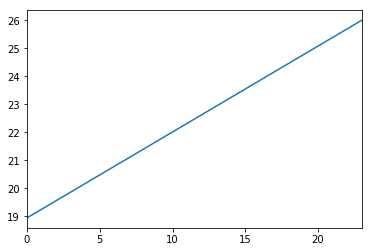

In [30]:
p['yhat'].plot()

In [86]:
pd.date_range('2015-06-25', '2015-06-26 23:59:00', freq='3Min')

DatetimeIndex(['2015-06-25 00:00:00', '2015-06-25 00:03:00',
               '2015-06-25 00:06:00', '2015-06-25 00:09:00',
               '2015-06-25 00:12:00', '2015-06-25 00:15:00',
               '2015-06-25 00:18:00', '2015-06-25 00:21:00',
               '2015-06-25 00:24:00', '2015-06-25 00:27:00',
               ...
               '2015-06-26 23:30:00', '2015-06-26 23:33:00',
               '2015-06-26 23:36:00', '2015-06-26 23:39:00',
               '2015-06-26 23:42:00', '2015-06-26 23:45:00',
               '2015-06-26 23:48:00', '2015-06-26 23:51:00',
               '2015-06-26 23:54:00', '2015-06-26 23:57:00'],
              dtype='datetime64[ns]', length=960, freq='3T')

In [100]:
train = tmax[tmax['ds'].isin(pd.date_range('2015-06-25', '2015-06-26 23:59:00', freq='H'))]

In [99]:
def run_prophet(train, test):
    prophet = Prophet()
    prophet.fit(train)
    
    future = prophet.make_future_dataframe(24, include_history=False, freq='H')
    fcst = prophet.predict(future)
    
    
    return prophet, fcst, mape(test['y'], fcst['yhat'])

In [101]:
r = run_prophet(train, test)
r[-1]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.3808477517222503

In [104]:
train = tmax[tmax['ds'].isin(pd.date_range('2015-06-20', '2015-06-26 23:59:00', freq='H'))]
r = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [105]:
r[-1]

0.06330445488917649

In [106]:
train = tmax[tmax['ds'].isin(pd.date_range('2015-05-26', '2015-06-26 23:59:00', freq='H'))]
r = run_prophet(train, test)
r[-1]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


0.09404764792285474

In [107]:
train = tmax[tmax['ds'].isin(pd.date_range('2015-04-26', '2015-06-26 23:59:00', freq='H'))]
r = run_prophet(train, test)
r[-1]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


0.06994693265502674

In [108]:
train = tmax[tmax['ds'].isin(pd.date_range('2015-03-26', '2015-06-26 23:59:00', freq='H'))]
r = run_prophet(train, test)
r[-1]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


0.21537841577670516

In [109]:
#não tem inverno?
train = tmax[tmax['ds'].isin(pd.date_range('2015-01-01', '2015-06-26 23:59:00', freq='H'))]
r = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [110]:
r[-1]

0.3008955288205095

In [39]:
train = tmax[tmax['ds'].isin(pd.date_range('2014-01-01', '2015-06-26 23:59:00', freq='H'))]
r = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


# selecionado

In [40]:
train = tmax[tmax['ds'].isin(pd.date_range('2015-06-19', '2015-06-26 23:59:00', freq='H'))]
prophet_7d, fcst, erro = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [41]:
test['y']

2029488    14.2
2029489    13.7
2029490    12.1
2029491    11.1
2029492    10.4
2029493     9.5
2029494     9.5
2029495    10.1
2029496    10.1
2029497    10.0
2029498     9.4
2029499    11.5
2029500    13.1
2029501    15.6
2029502    16.3
2029503    17.4
2029504    18.7
2029505    19.7
2029506    19.8
2029507    19.5
2029508    19.4
2029509    16.7
2029510    15.2
2029511    14.3
Name: y, dtype: float64

In [42]:
test['ds']

2029488   2015-06-27 00:00:00
2029489   2015-06-27 01:00:00
2029490   2015-06-27 02:00:00
2029491   2015-06-27 03:00:00
2029492   2015-06-27 04:00:00
2029493   2015-06-27 05:00:00
2029494   2015-06-27 06:00:00
2029495   2015-06-27 07:00:00
2029496   2015-06-27 08:00:00
2029497   2015-06-27 09:00:00
2029498   2015-06-27 10:00:00
2029499   2015-06-27 11:00:00
2029500   2015-06-27 12:00:00
2029501   2015-06-27 13:00:00
2029502   2015-06-27 14:00:00
2029503   2015-06-27 15:00:00
2029504   2015-06-27 16:00:00
2029505   2015-06-27 17:00:00
2029506   2015-06-27 18:00:00
2029507   2015-06-27 19:00:00
2029508   2015-06-27 20:00:00
2029509   2015-06-27 21:00:00
2029510   2015-06-27 22:00:00
2029511   2015-06-27 23:00:00
Name: ds, dtype: datetime64[ns]

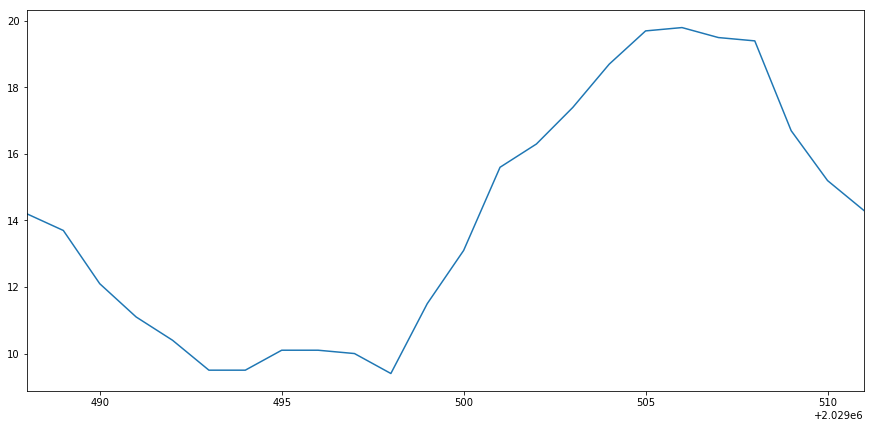

In [43]:
test['y'].plot(figsize=(15,7))

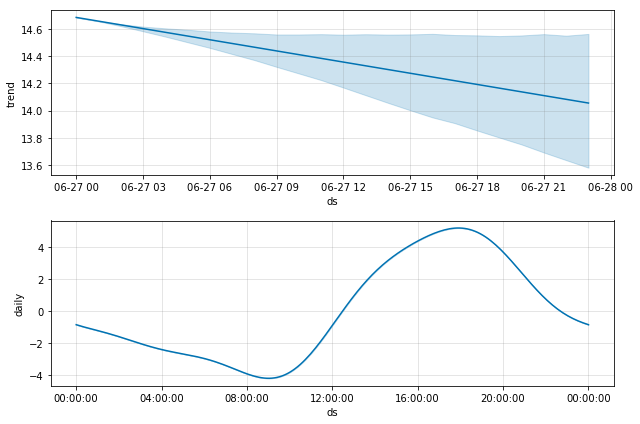

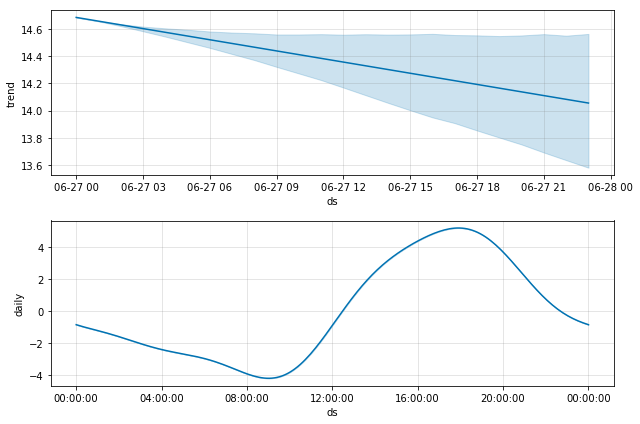

In [44]:
prophet_7d.plot_components(fcst)

# CV

In [114]:
train = tmax[tmax['ds'].isin(pd.date_range('2014-01-01', '2014-12-31 23:59:00', freq='H'))]

In [46]:
prophet_2014, fcst, erro = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [47]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_2014, initial='28 days', period='7 days', horizon = '7 days')
df_cv.head()

INFO:fbprophet:Making 48 forecasts with cutoffs between 2014-01-29 23:00:00 and 2014-12-24 23:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-30 00:00:00,24.259789,22.381892,25.925143,23.2,2014-01-29 23:00:00
1,2014-01-30 01:00:00,23.390130,21.662288,25.054126,22.8,2014-01-29 23:00:00
2,2014-01-30 02:00:00,22.948938,21.255710,24.772211,23.5,2014-01-29 23:00:00
3,2014-01-30 03:00:00,22.652982,20.912537,24.504505,22.4,2014-01-29 23:00:00
4,2014-01-30 04:00:00,22.229113,20.430079,23.942749,22.3,2014-01-29 23:00:00


In [48]:
(df_cv['ds'] - pd.Timedelta(7,'D')).dt.weekday

0       3
1       3
2       3
3       3
4       3
       ..
8059    2
8060    2
8061    2
8062    2
8063    2
Name: ds, Length: 8064, dtype: int64

In [49]:
from fbprophet.diagnostics import performance_metrics

In [50]:
performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,0 days 17:00:00,6.795177,2.606756,1.643695,0.789185
1,0 days 18:00:00,7.040374,2.653370,1.688952,0.777502
2,0 days 19:00:00,7.238305,2.690410,1.732685,0.767835
3,0 days 20:00:00,7.457309,2.730807,1.777391,0.757703
4,0 days 21:00:00,7.788036,2.790705,1.828569,0.753464
...,...,...,...,...,...
147,6 days 20:00:00,9.038705,3.006444,2.316212,0.623294
148,6 days 21:00:00,9.149415,3.024800,2.330309,0.623036
149,6 days 22:00:00,9.280644,3.046415,2.346720,0.622984
150,6 days 23:00:00,9.272619,3.045098,2.343734,0.619779


In [61]:
df_cv_nonzero = df_cv[df_cv['y'] != 0]
perf = performance_metrics(df_cv_nonzero)
perf.sort_values("horizon")

,horizon,mse,rmse,mae,mape,coverage
0,0 days 17:00:00,3.868295,1.966798,1.530741,0.082674,0.793114
1,0 days 18:00:00,4.113827,2.028257,1.575611,0.083685,0.781638
2,0 days 19:00:00,4.311558,2.076429,1.619335,0.084448,0.771867
3,0 days 20:00:00,4.529331,2.128222,1.663922,0.085038,0.761321
4,0 days 21:00:00,4.858236,2.204141,1.714668,0.085967,0.757289
...,...,...,...,...,...,...
147,6 days 20:00:00,9.038705,3.006444,2.316212,0.117673,0.623294
148,6 days 21:00:00,9.149415,3.024800,2.330309,0.116024,0.623036
149,6 days 22:00:00,9.280644,3.046415,2.346720,0.114470,0.622984
150,6 days 23:00:00,9.272619,3.045098,2.343734,0.112328,0.619779


In [52]:
from fbprophet.plot import plot_cross_validation_metric

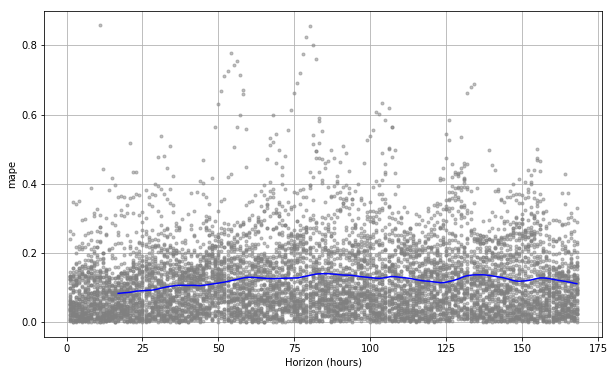

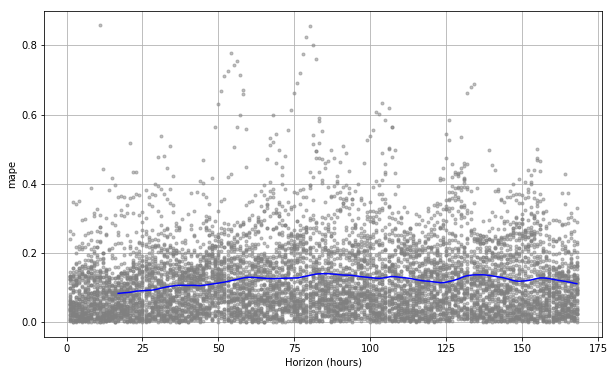

In [53]:
plot_cross_validation_metric(df_cv_nonzero, 'mape')

In [115]:
baseline_yhat = []
for date in (df_cv_nonzero['ds'] - pd.Timedelta(7,'D')):
    baseline_yhat.append(train[train['ds'] == date]['y'].values[0])
df_cv_nonzero['baseline'] = baseline_yhat

/Users/mario/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
mape(df_cv_nonzero['y'], df_cv_nonzero['baseline'])

0.13751060877598836

In [111]:
mape(df_cv_nonzero['y'], df_cv_nonzero['yhat'])

0.11761402225673434

In [119]:
mape(df_cv_nonzero['y'], 0.1*df_cv_nonzero['baseline']+0.9*df_cv_nonzero['yhat'])

0.11694975947102952